<a href="https://www.kaggle.com/code/kitsewio/smoke-fire-detection-w-yolov8?scriptVersionId=229775055" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 📌If the laptop seemed useful to you, please do not forget to vote!❤️

  🎯 This notebook presents work with YOLOv8. The result of the training was obtained according to mAP50: 0.658 - for all classes, 0.717 - for smoke, 0.599 - for fire ***in just 10 epochs***!

# 📥 Loading required libraries

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 38.2 MB/s eta 0:00:00


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
import torch
from PIL import Image
from IPython.display import display, Video
from ultralytics import YOLO
from collections import deque
import subprocess

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Paths to datasets

In [3]:
test_dir = "/kaggle/input/smoke-fire-detection-yolo/data/test"
train_dir = "/kaggle/input/smoke-fire-detection-yolo/data/train"
val_dir = "/kaggle/input/smoke-fire-detection-yolo/data/val"
annot_dir = "/kaggle/input/smoke-fire-detection-yolo/data.yaml"

# 📝 Creating a file .yaml

In the original data file.yaml is the wrong way to the dataset, so it was decided to create a new one without unnecessary characters.

In [4]:
classes = ['smoke', 'fire']

data_yaml_content = f"""
train: {train_dir}
val: {val_dir}
test: {test_dir}

nc: {len(classes)}
names: {classes}
"""

yaml_path = "/kaggle/working/data.yaml"
with open(yaml_path, "w") as f:
    f.write(data_yaml_content)

!cat {yaml_path}


train: /kaggle/input/smoke-fire-detection-yolo/data/train
val: /kaggle/input/smoke-fire-detection-yolo/data/val
test: /kaggle/input/smoke-fire-detection-yolo/data/test

nc: 2
names: ['smoke', 'fire']


# 📥 Loading the model

In [5]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 187MB/s]


In [6]:
device=torch.device(0)
model.to(device)
device

device(type='cuda', index=0)

# 🦾 Training a pre-trained model

In [7]:
history = model.train(
    data=yaml_path,
    epochs=10,
    imgsz=640,
    pretrained=True,
    batch=32,
    device=device
)

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=Fal

100%|██████████| 755k/755k [00:00<00:00, 43.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 187MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/smoke-fire-detection-yolo/data/train/labels... 14101 images, 6457 backgrounds, 21 corrupt: 100%|██████████| 14122/14122 [01:12<00:00, 196.06it/s]

train: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB02521.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB02521.jpg'
train: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB06626.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB06626.jpg'
train: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07199.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07199.jpg'
train: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07271.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07271.jpg'
train: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07278.jpg: ig

train: WARNING ⚠️ Cache directory /kaggle/input/smoke-fire-detection-yolo/data/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/smoke-fire-detection-yolo/data/val/labels... 3094 images, 1375 backgrounds, 5 corrupt: 100%|██████████| 3099/3099 [00:14<00:00, 209.97it/s]

val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07535.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07535.jpg'
val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07536.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07536.jpg'
val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07539.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07539.jpg'
val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07542.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07542.jpg'
val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07561.jpg: ignoring corrupt image/label: 

val: WARNING ⚠️ Cache directory /kaggle/input/smoke-fire-detection-yolo/data/val is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.85G      1.844      3.388      1.718         32        640: 100%|██████████| 441/441 [02:26<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]


                   all       3094       3917       0.42      0.386      0.349       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      6.38G      1.883      2.182      1.743         26        640: 100%|██████████| 441/441 [02:22<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.69it/s]


                   all       3094       3917      0.528      0.459      0.461      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      6.38G      1.841      1.984      1.696         40        640: 100%|██████████| 441/441 [02:20<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.68it/s]


                   all       3094       3917      0.511      0.414       0.42      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      6.39G       1.81       1.91      1.689         37        640: 100%|██████████| 441/441 [02:20<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.69it/s]


                   all       3094       3917      0.534      0.467      0.475      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      6.39G      1.746      1.765      1.629         37        640: 100%|██████████| 441/441 [02:20<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.76it/s]


                   all       3094       3917      0.618      0.492      0.537      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      6.39G      1.677      1.639      1.566         23        640: 100%|██████████| 441/441 [02:19<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.71it/s]


                   all       3094       3917      0.585      0.545      0.572       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      6.39G      1.626      1.549      1.524         23        640: 100%|██████████| 441/441 [02:19<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.80it/s]


                   all       3094       3917      0.621      0.566      0.602      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      6.39G       1.58      1.468      1.496         33        640: 100%|██████████| 441/441 [02:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.71it/s]


                   all       3094       3917      0.638      0.583      0.625      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      6.39G      1.527      1.387      1.458         21        640: 100%|██████████| 441/441 [02:19<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.76it/s]


                   all       3094       3917      0.681      0.601      0.656      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      6.39G      1.484      1.314      1.428         22        640: 100%|██████████| 441/441 [02:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.91it/s]


                   all       3094       3917      0.676      0.614      0.673      0.377

10 epochs completed in 0.431 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:14<00:00,  3.44it/s]


                   all       3094       3917      0.679      0.613      0.673      0.377
                 smoke       1545       1751      0.694      0.694      0.732      0.427
                  fire        875       2166      0.665      0.531      0.614      0.327


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


Here we can see what learning outcomes the model has achieved.

# 📈 Visualization of training

Loss naturally dropped throughout the entire training, and accuracy increased.

In [8]:
train_results = "runs/detect/train2/results.png"

if os.path.exists(train_results):
    img = Image.open(train_results)
    display(img)
else:
    print("Training results image not found.")

Training results image not found.


# 👀 Visualization of the model's operation

In [9]:
import glob


image 1/1 /kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB10529.jpg: 480x640 3 fires, 6.9ms
Speed: 1.9ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB10244.jpg: 384x640 (no detections), 7.3ms
Speed: 0.9ms preprocess, 7.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB10099.jpg: 352x640 1 smoke, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)

image 1/1 /kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB11017.jpg: 320x640 1 smoke, 31.4ms
Speed: 1.4ms preprocess, 31.4ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)

image 1/1 /kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB09968.jpg: 384x640 (no detections), 7.1ms
Speed: 0.9ms preprocess, 7.1ms inference, 0.5ms postprocess per image at 

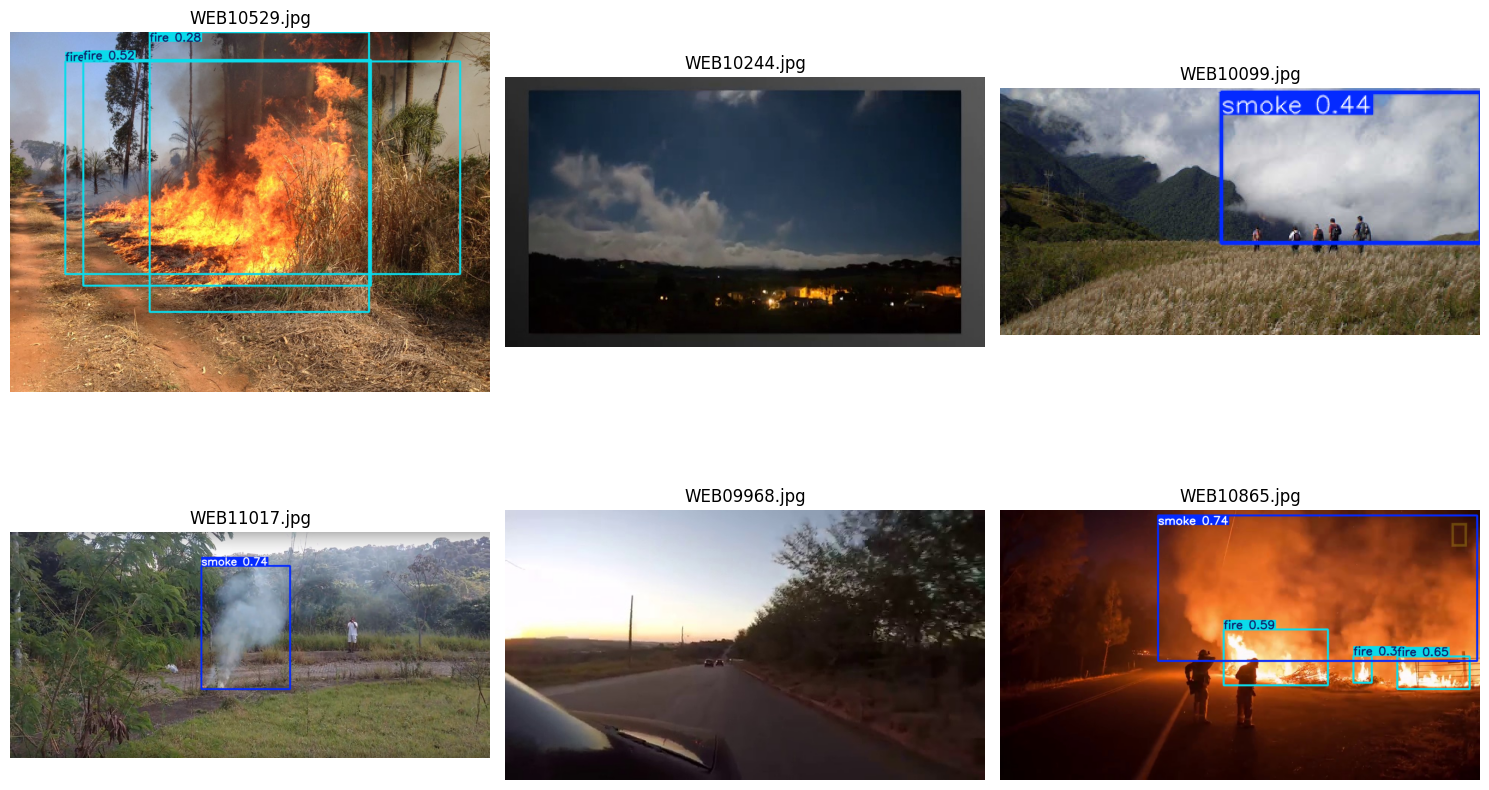

In [18]:
all_images = glob.glob("/kaggle/input/smoke-fire-detection-yolo/data/test/images/*.jpg")

test_images = random.sample(all_images, 6)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for img_path, ax in zip(test_images, axes.flatten()):
    results = model(img_path)      
    result_img = results[0].plot() 
    
    img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.axis("off")
    ax.set_title(os.path.basename(img_path))  

plt.tight_layout()
plt.show()

In [11]:
metrics = model.val(data=yaml_path, split="test")

Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)


val: Scanning /kaggle/input/smoke-fire-detection-yolo/data/test/labels... 4295 images, 2005 backgrounds, 19 corrupt: 100%|██████████| 4306/4306 [00:20<00:00, 206.34it/s]

val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB10769.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0297]
val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB10770.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0078]
val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB10775.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0156]
val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB10821.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0094]
val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB11090.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0028]
val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB11243.jpg: ignoring corrupt image/label: [Errno 3

val: WARNING ⚠️ Cache directory /kaggle/input/smoke-fire-detection-yolo/data/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:19<00:00,  6.81it/s]


                   all       4287       5156      0.663      0.604      0.658      0.362
                 smoke       2062       2294      0.669      0.688      0.717      0.414
                  fire       1108       2862      0.658      0.519      0.599      0.309


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train2
